<a href="https://colab.research.google.com/github/Preetvani07/Weapon-detection-Yolov9/blob/main/Weapon_Detection__yolo_v9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Remember to Change The Path before running cells*

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Dr8vSJ9bopvAAaQYTiuR")
project = rf.workspace("buildx").project("weapon-detection-7kro8")
version = project.version(2)
dataset = version.download("yolov9")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Weapon-Detection--2 in yolov9:: 100%|██████████| 19058/19058 [00:03<00:00, 4895.53it/s]


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.1/112.6 GB disk)


In [ ]:
!yolo task= detect mode= train data=/content/Weapon-Detection--2/data.yaml model=yolov9m.pt epochs=10 imgsz=640 batch=16

100% 39.1M/39.1M [00:00<00:00, 106MB/s] 
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9m.pt, data=/content/Weapon-Detection--2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import Image, display

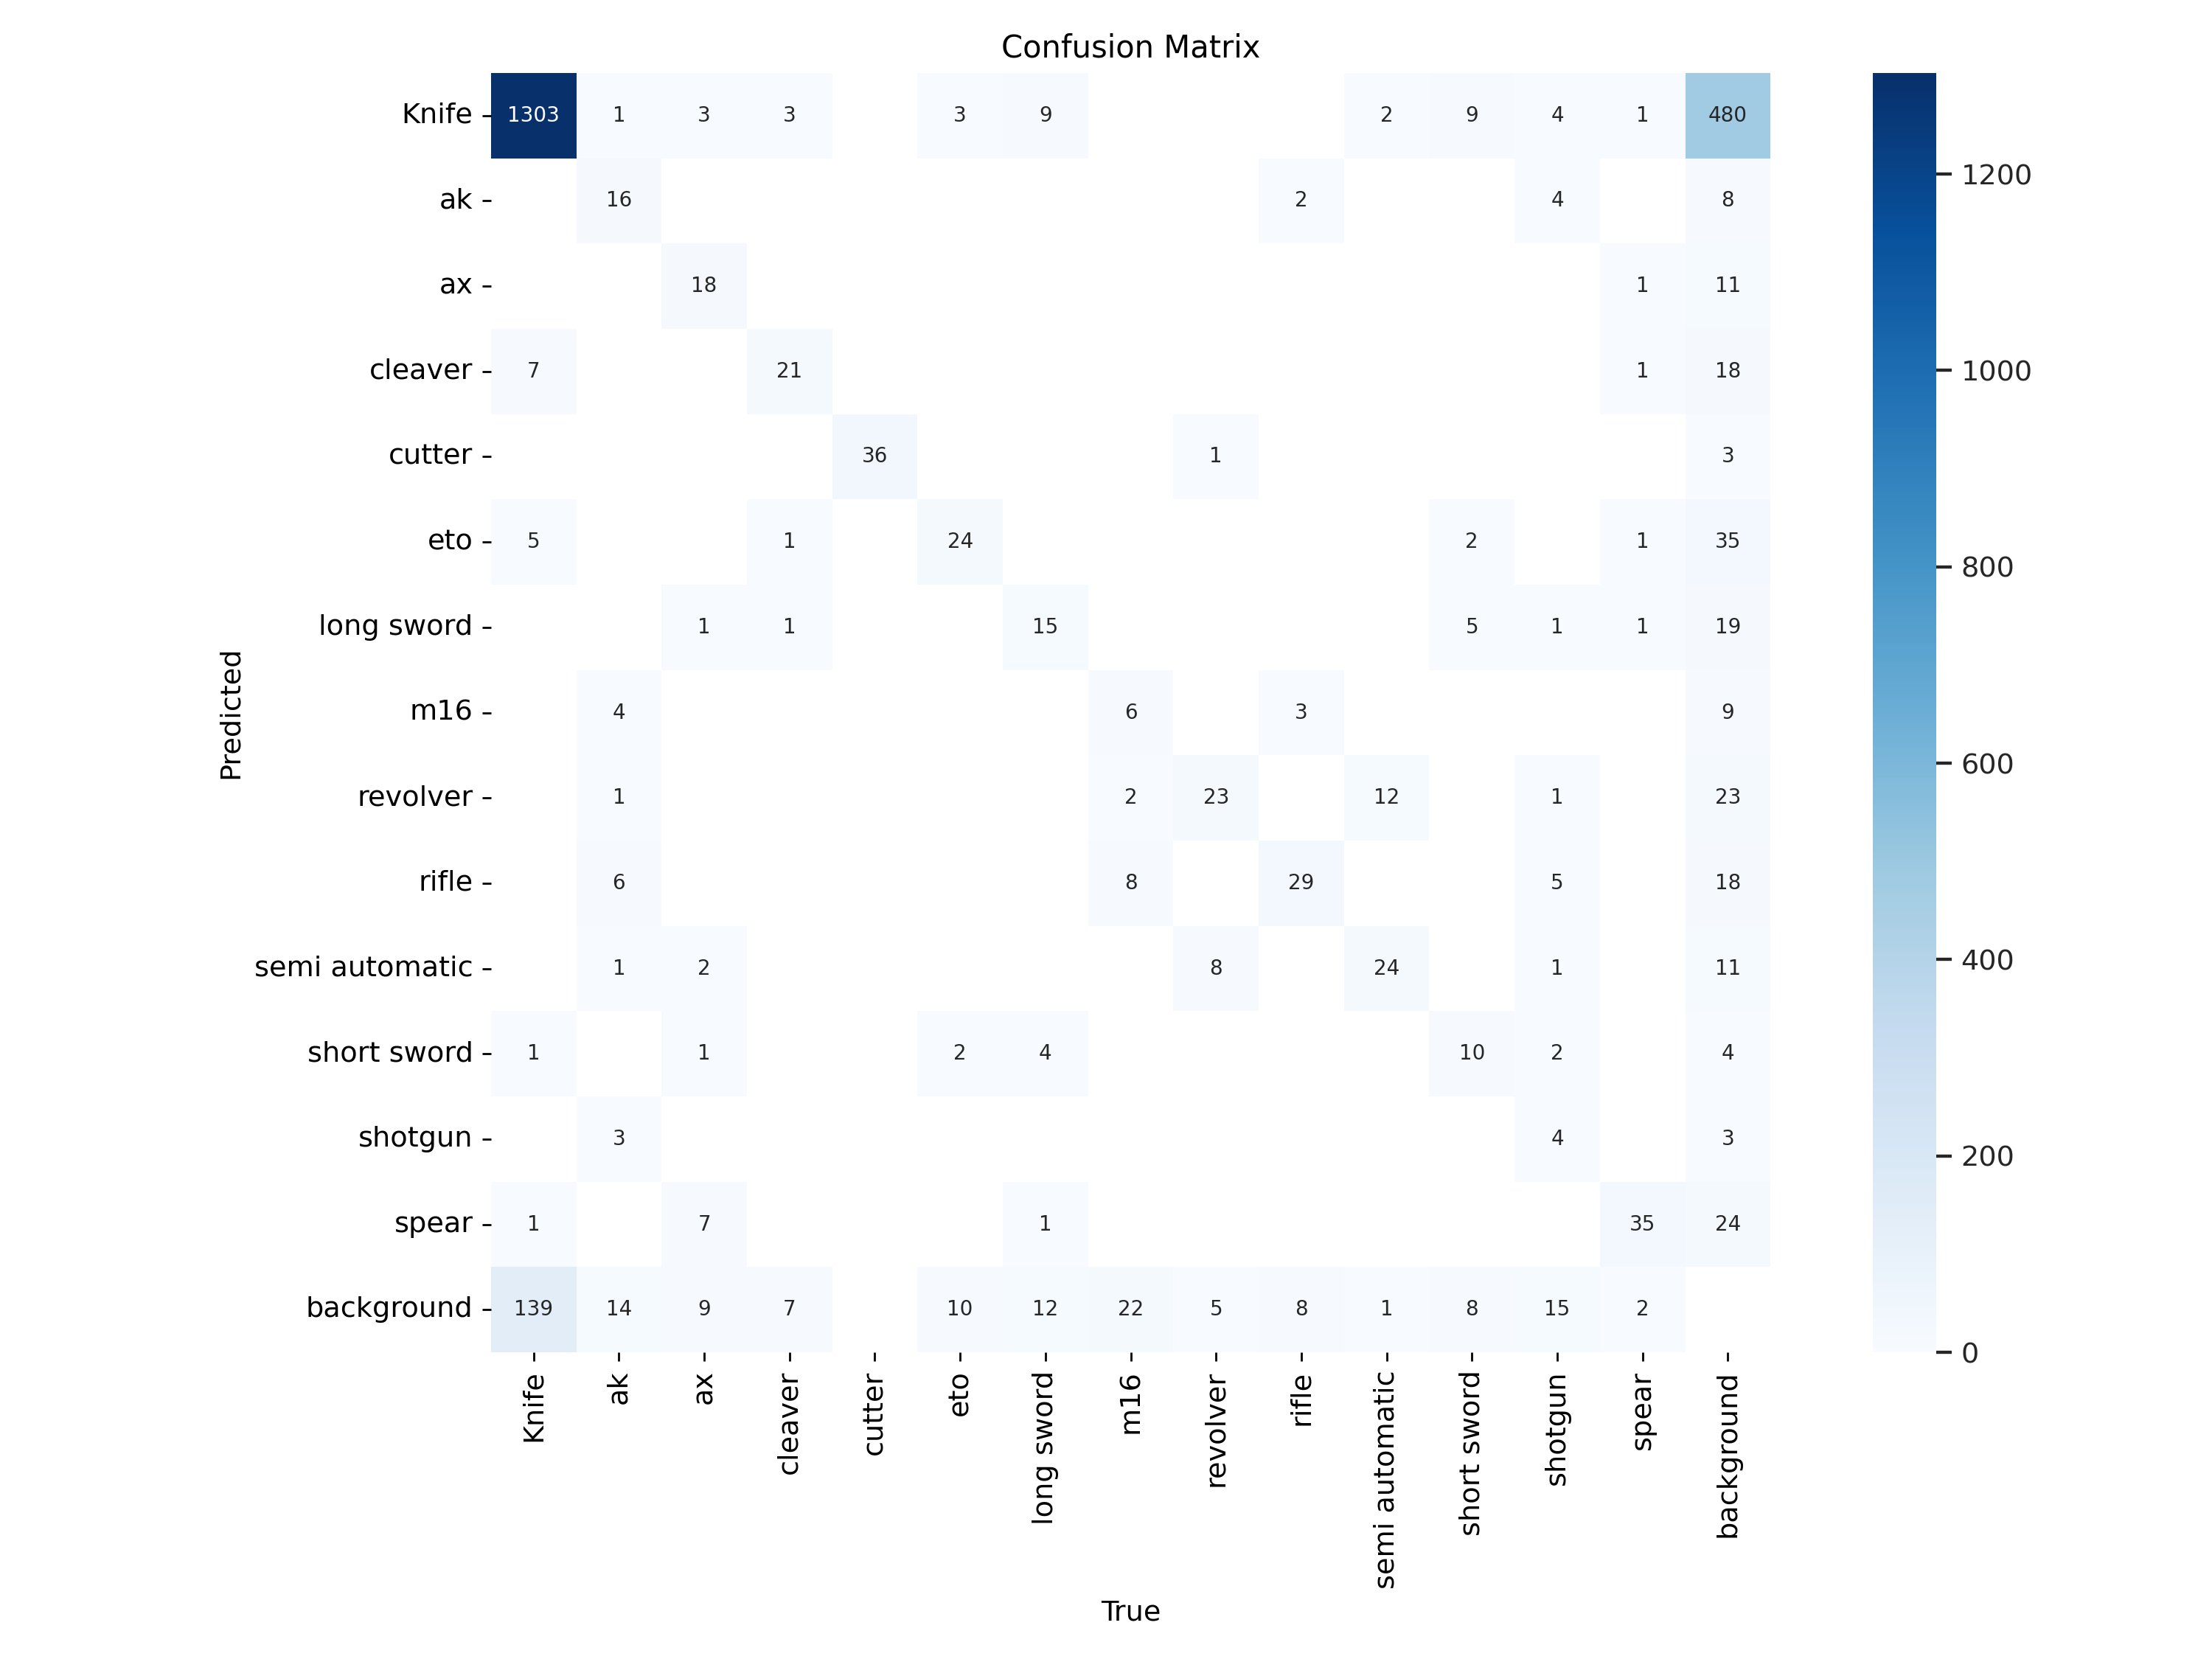

In [ ]:
display(Image(filename=f"/content/runs/detect/train/confusion_matrix.png", width=1000))

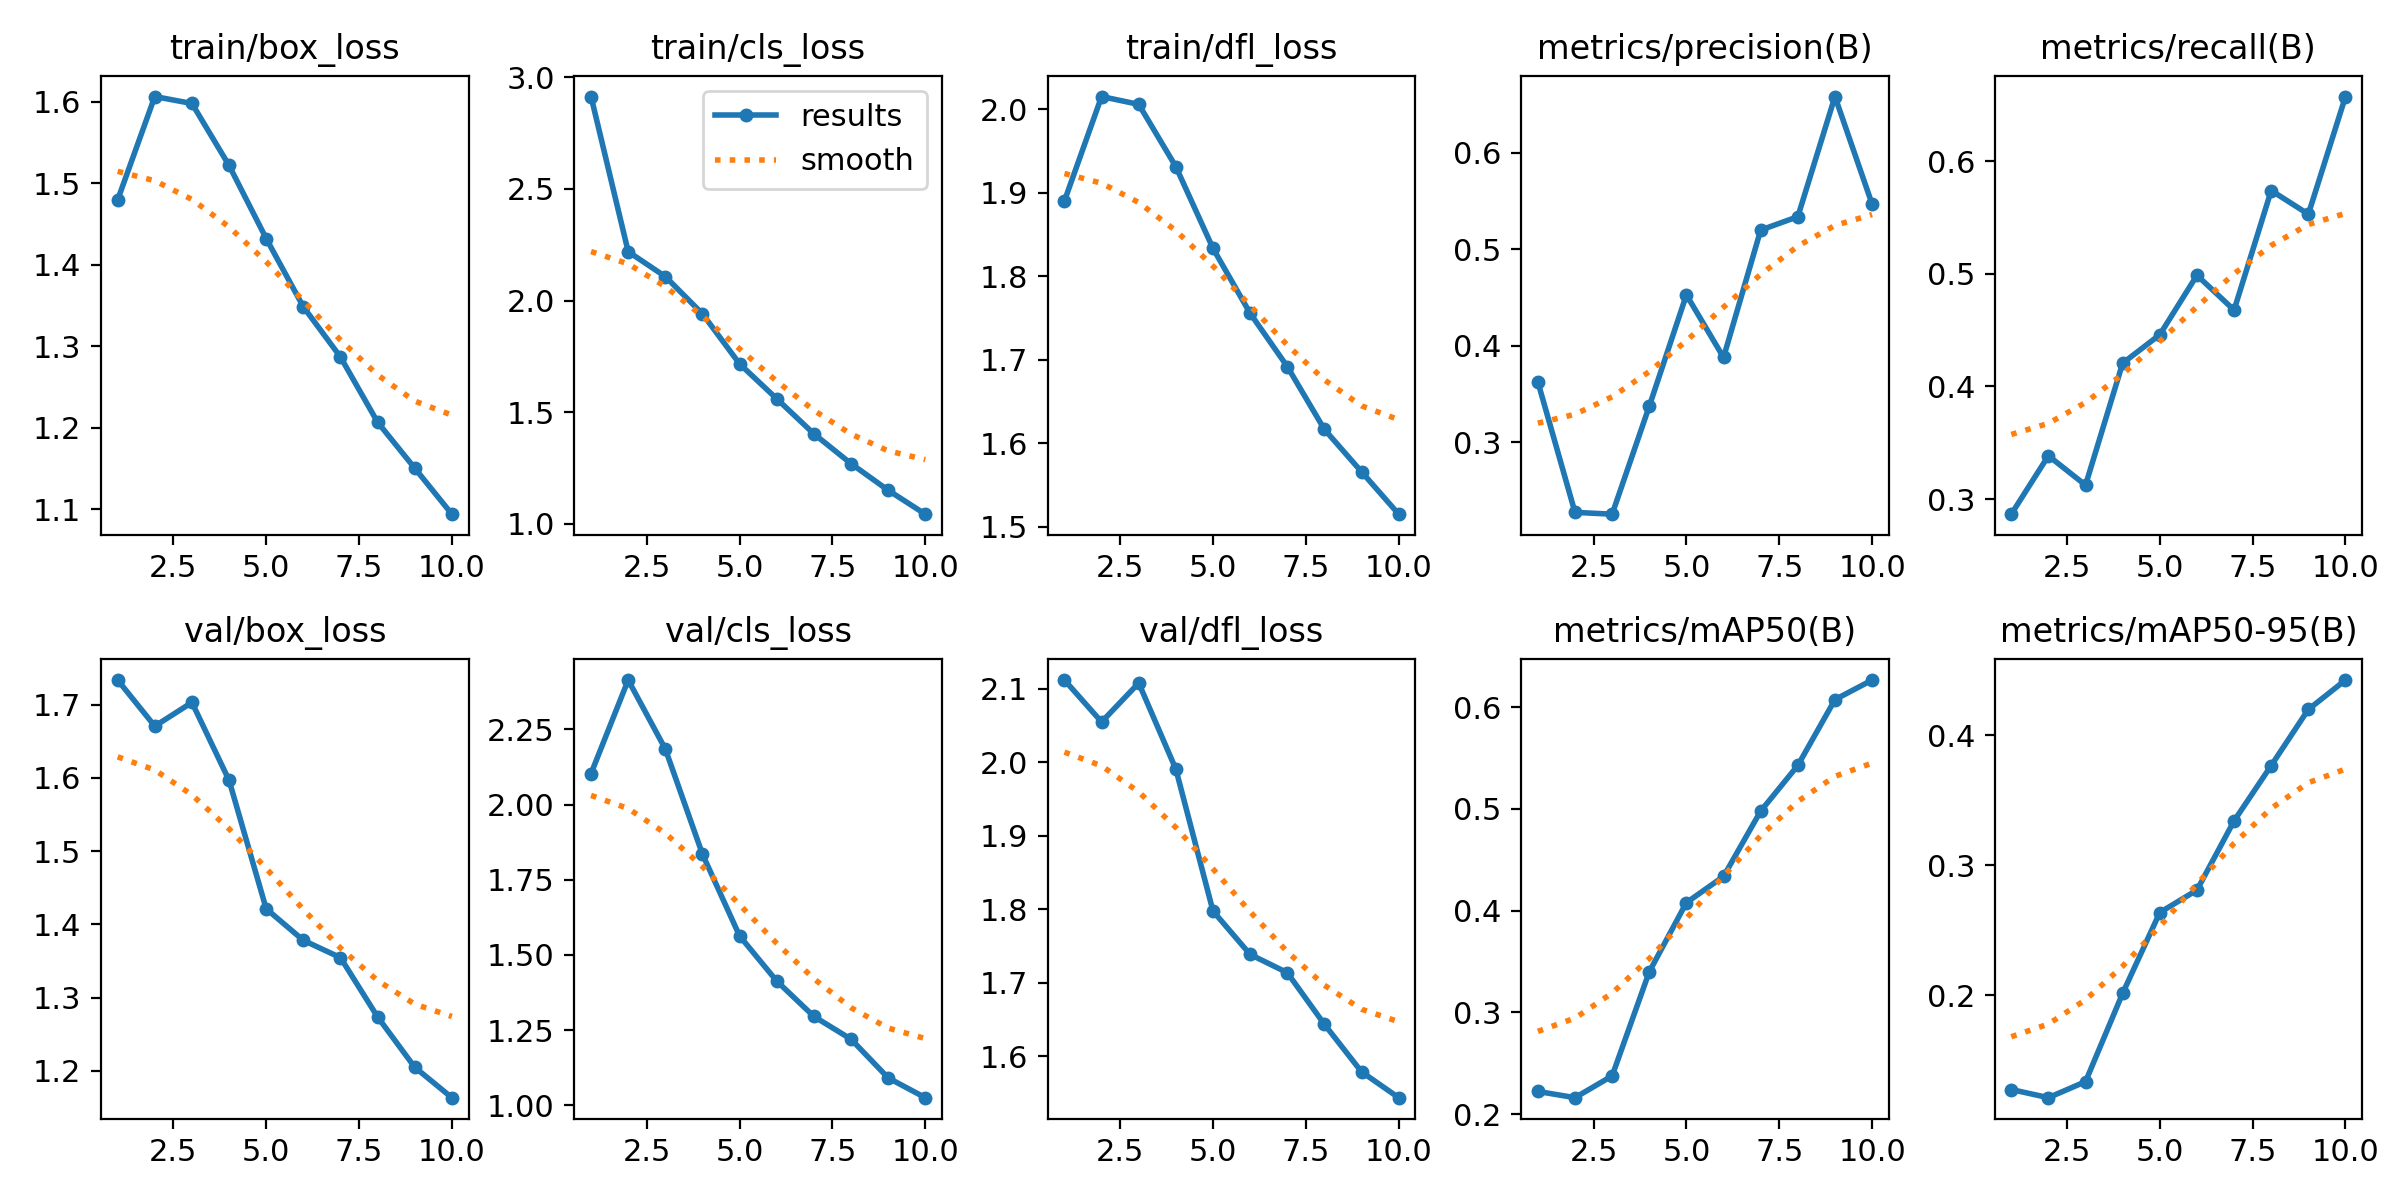

In [ ]:
display(Image(filename=f"//content/runs/detect/train/results.png", width=1000))

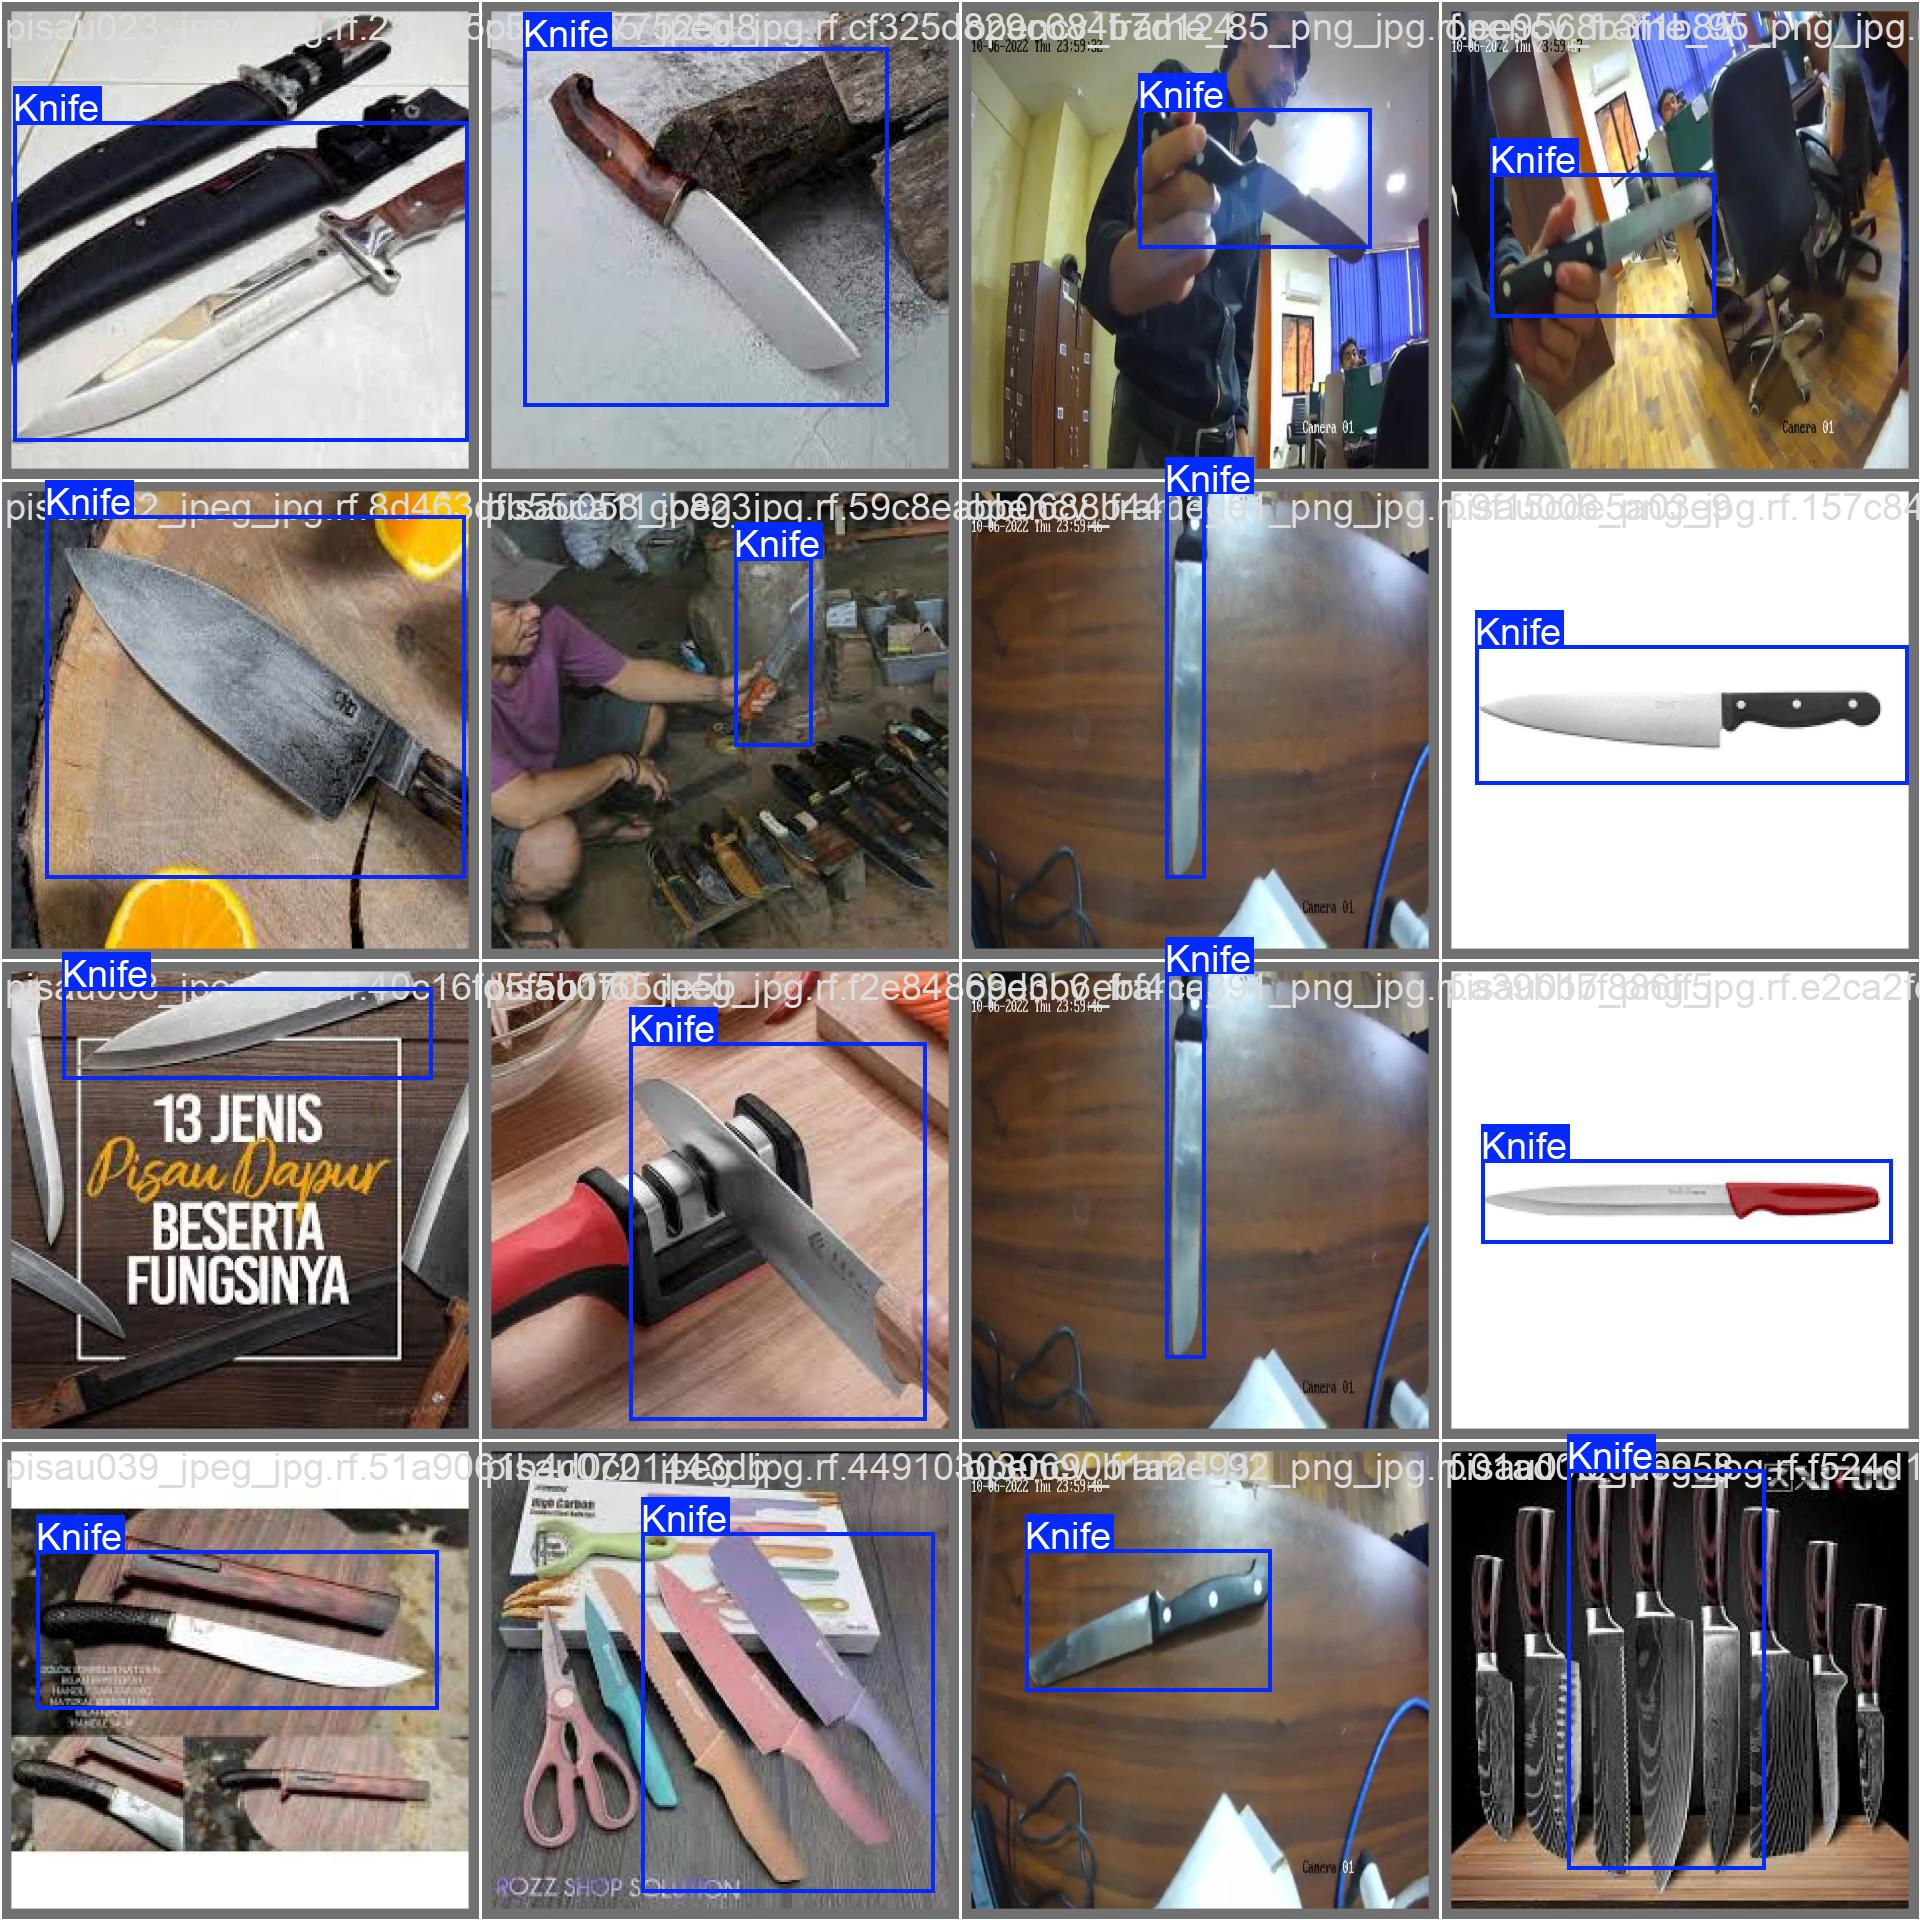

In [ ]:
display(Image(filename=f"/content/runs/detect/train/val_batch0_labels.jpg", width=1000))

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt imgsz=640 conf=0.5 \
source=//content/Weapon-Detection--2/test/images

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9m summary (fused): 374 layers, 20,023,114 parameters, 0 gradients, 76.6 GFLOPs

image 1/983 //content/Weapon-Detection--2/test/images/09QGEI62WX5A_jpg.rf.dce6620da5d17b3e52e0324905dabd6d.jpg: 640x640 (no detections), 40.3ms
image 2/983 //content/Weapon-Detection--2/test/images/0GXLS8TXBIBY_jpg.rf.b7aa92276858d82f63f2e64d641547f2.jpg: 640x640 1 Knife, 40.4ms
image 3/983 //content/Weapon-Detection--2/test/images/0Y7VH7ZMLYN7_jpg.rf.be0c613f9d6c75d5cfc9a8fbbc565fa9.jpg: 640x640 1 Knife, 39.5ms
image 4/983 //content/Weapon-Detection--2/test/images/10027_bmp_jpg.rf.0ed5d6c1c7fbc41a87e50c018654e0c8.jpg: 640x640 (no detections), 39.5ms
image 5/983 //content/Weapon-Detection--2/test/images/10040_bmp_jpg.rf.8490c3b98e5de5d7140a59567a243c9d.jpg: 640x640 (no detections), 39.5ms
image 6/983 //content/Weapon-Detection--2/test/images/10045_bmp_jpg.rf.3165f7c4f229e21a933db9b525e32dea.jpg: 640x640 1 Knife, 39.5ms
i

In [ ]:
# Display inference on ALL test images
import glob
from IPython.display import Image, display
i = 0
for imageName in glob.glob("/content/runs/detect/predict*.jpg"): #assuming JPG
    if i %15 ==0 :
        print("\n")
        display(Image(filename=imageName))
    i = i +1

